# Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:,-1].values

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [5]:
#Encoding Cateforical Data
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:,1]= labelencoder_X_1.fit_transform(X[:,1])#Encoding geography variable
labelencoder_X_2 = LabelEncoder()
X[:,2]= labelencoder_X_2.fit_transform(X[:,2])#Encoding Gender variable
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()

/home/samir/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/samir/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [6]:
X[:5]#Displaying X variable

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
        0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.0800000e+02,
        0.0000000e+00, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.0200000e+02,
        0.0000000e+00, 4.2000000e+01, 8.0000000e+00, 1.5966080e+05,
        3.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.1393157e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.9900000e+02,
        0.0000000e+00, 3.9000000e+01, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.3826630e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 8.5000000e+02,
        0.0000000e+00, 4.3000000e+01, 2.0000000e+00, 1.2551082e+05,
        1.0000000e+00, 1.0000000e+00, 1.0000

In [7]:
#removing dummy variable
X = X[:,1:]

We made a dummy variable for country and remove the first column to avoid dummy variable trap.<br>
There is no need to create dummy variable for gender column as there are only two variables.

In [8]:
X[:5]

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, 0.0000000e+00,
        4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, 0.0000000e+00,
        4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, 0.0000000e+00,
        4.2000000e+01, 8.0000000e+00, 1.5966080e+05, 3.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.1393157e+05],
       [0.0000000e+00, 0.0000000e+00, 6.9900000e+02, 0.0000000e+00,
        3.9000000e+01, 1.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.3826630e+04],
       [0.0000000e+00, 1.0000000e+00, 8.5000000e+02, 0.0000000e+00,
        4.3000000e+01, 2.0000000e+00, 1.2551082e+05, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 7.9084100e+04]])

In [9]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Making ANN

In [11]:
#importing the keras libraries and packages
import keras

Using TensorFlow backend.
/home/samir/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/samir/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/samir/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/samir/anaconda3/lib/python3.7/site-packages/tensorflo

**Modules**<br>
* `Sequentials module` :- It is required to initialize our neural network
* `Dense module` : It is required to build the layers of our ANN<br><br>
step 1 : Random initialisation of the weights to small numbers close to 0 can be handled by `Dense` `Module`<br> 
<br>
Initialising the ANN means defining the neural network as sequence of layers.<br>
There are actually two ways of initializing a deep neural network<br><br>
* By defining sequence of layers
* By defining a graph 

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
#Initialising the ANN
#Note : our problem is a classification problem
classifier = Sequential()
#We defined our NN as sequence of layers

The first layers will be first input layer and the hidden layer.<br>
**Arguments**<br>
`Dense`(`units`, `activation`=None, `use_bias`=True, `kernel_initializer`='glorot_uniform', `bias_initializer`='zeros', `kernel_regularizer`=None, `bias_regularizer`=None, `activity_regularizer`=None, `kernel_constraint`=None, `bias_constraint`=None, \*\*kwargs)<br>
number of `Nodes` in the input layer will be equal to number of `independent variable`<br>
`output_dim` : no. of nodes we want to add in this hidden layer because more precisely the add function does is not to add input layer in the first layer but it really does is add this hidden by specifying no. of input in previous layer.<br>
Parameter Tuning is a technique like k4 cross validation used to tune the model.<br>
Here for choosing number of nodes in the layer we will take the average of the number of nodes in the input layer and number of nodes in the output layer.<br>
for here number of nodes in the hidden layer = (11+1)/2 = 6<br>
So `output_dim` or `units` = 6<br>
`kernel_initializer` or `init`: Randomly initialiaze the weight as small number close to 0.<br>
`activation`='relu' : For hidden layer we will choose rectifier function as activation function and for output layer we will choose sigmoid function.<br>
`input_dim` : The number of nodes in the input layer that is the number of independent variables 

In [14]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim= 11))#Adding the layer to ANN 

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#Adding the second Hidden layer
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))#Adding the layer to ANN 
#For second hidden layer we don't need to specify the input_dim parameter
#because NN what it will get input in second layer

In [16]:
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))#Adding the layer to ANN 

sigmoid vs softmax<br>
softmax : If we are dealing with dependent variables which has more than two categories we will use **softmax** and accordingly we have to change output_dim or units parameter because when we onehot encode a **dependent variable** it may result into two or more than 2 variables.

In [17]:
from IPython.display import Image

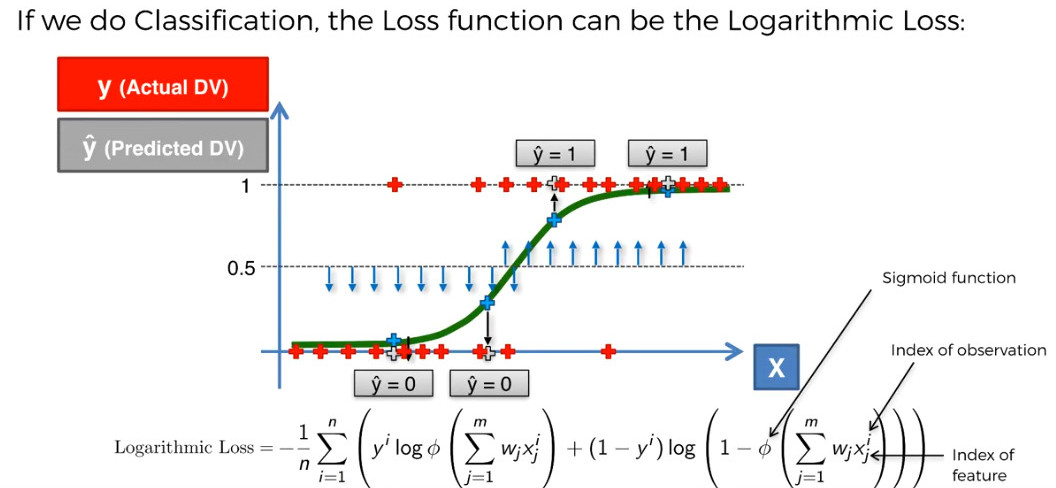

In [18]:
Image(filename='/home/samir/Desktop/@ML/08. Deep Learning/01. Artificial Neural Network/Images/s.jpg',height=700,width=700)

stochastic gradient descent for Logistic regression model is :<br>
Here the loss function will not be sum of squared error as it was for linear regression models instead it will Logarithmic Loss function.<br>
If our dependent variable has a binary outcome then this logarthmic loss function is called **binary_crossentropy** and if our dependent variable has more than two outcome then this logarithmic loss function is called **categorical_crossentropy** function.<br>
metrics : criterion chosen to evaluate your model

In [19]:
#applying stochastic gradient descent
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Here loss is the error produced while calculating stochastic gradient descent
#here we will provide logarithmic loss function

Next step is choosing number of epochs i.e. no. of times we are training our ANN on the whole training set.<br>

In [20]:
#Fitting the ANN to the training set
classifier.fit(X_train,y_train,batch_size=10,nb_epoch=100)   

Instructions for updating:
Use tf.cast instead.


/home/samir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
8000/8000 [==============================] - 1s 156us/step - loss: 0.4919 - accuracy: 0.7947
Epoch 2/100
8000/8000 [==============================] - 1s 128us/step - loss: 0.4295 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4250 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.4212 - accuracy: 0.8073
Epoch 5/100
8000/8000 [==============================] - 1s 128us/step - loss: 0.4177 - accuracy: 0.8214
Epoch 6/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.4156 - accuracy: 0.8295
Epoch 7/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.4142 - accuracy: 0.8284
Epoch 8/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.4120 - accuracy: 0.8306
Epoch 9/100
8000/8000 [==============================] - 1s 128us/step - loss: 0.4112 - accuracy: 0.8316
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 1s 133us/step - loss: 0.4009 - accuracy: 0.8353
Epoch 79/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.4003 - accuracy: 0.8340
Epoch 80/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.3997 - accuracy: 0.8356
Epoch 81/100
8000/8000 [==============================] - 1s 152us/step - loss: 0.4000 - accuracy: 0.8342
Epoch 82/100
8000/8000 [==============================] - 2s 201us/step - loss: 0.4006 - accuracy: 0.8349
Epoch 83/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4005 - accuracy: 0.8346
Epoch 84/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.4005 - accuracy: 0.8356
Epoch 85/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.4001 - accuracy: 0.8347
Epoch 86/100
8000/8000 [==============================] - 1s 129us/step - loss: 0.4002 - accuracy: 0.8338
Epoch 87/100
8000/8000 [==============================] - 1

# Part - 3 Making the prediction and evaluating the model

In [21]:
#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)#To return result in the form of true and false

In [22]:
y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [23]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1546,   49],
       [ 269,  136]])

In [24]:
print('Accuracy = ',((cm[0,0]+cm[1,1])/2000)*100,'%')

Accuracy =  84.1 %
